# Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import math
import random

from sklearn import svm


In [2]:
# Load density data

MMS2_n = pd.read_csv('MMS2_n.csv',
                     header = 0,names = ['times','n','date'],
                     parse_dates=['date'])



MMS2_Tpara = pd.read_csv('MMS2_Tpara.csv',
                     header = 0,names = ['times','Tpara','date'],
                     parse_dates=['date'])


MMS2_n

,times,n,date
0,1.592421e+09,0.384797,2020-06-17 19:17:13.094996992
1,1.592421e+09,0.390098,2020-06-17 19:17:13.244997120
2,1.592421e+09,0.400450,2020-06-17 19:17:13.394996992
3,1.592421e+09,0.377668,2020-06-17 19:17:13.544997120
4,1.592421e+09,0.395304,2020-06-17 19:17:13.694996992
...,...,...,...
134580,1.592452e+09,13.960220,2020-06-18 03:41:32.274036992
134581,1.592452e+09,13.939400,2020-06-18 03:41:32.424037120
134582,1.592452e+09,14.419994,2020-06-18 03:41:32.574036992
134583,1.592452e+09,14.073477,2020-06-18 03:41:32.724037120


In [3]:
MMS2_Tpara

,times,Tpara,date
0,1.592421e+09,1732.177700,2020-06-17 19:17:13.094996992
1,1.592421e+09,1587.155500,2020-06-17 19:17:13.244997120
2,1.592421e+09,1723.268600,2020-06-17 19:17:13.394996992
3,1.592421e+09,1779.204100,2020-06-17 19:17:13.544997120
4,1.592421e+09,1544.863400,2020-06-17 19:17:13.694996992
...,...,...,...
134580,1.592452e+09,58.338394,2020-06-18 03:41:32.274036992
134581,1.592452e+09,57.243416,2020-06-18 03:41:32.424037120
134582,1.592452e+09,60.180473,2020-06-18 03:41:32.574036992
134583,1.592452e+09,58.443974,2020-06-18 03:41:32.724037120


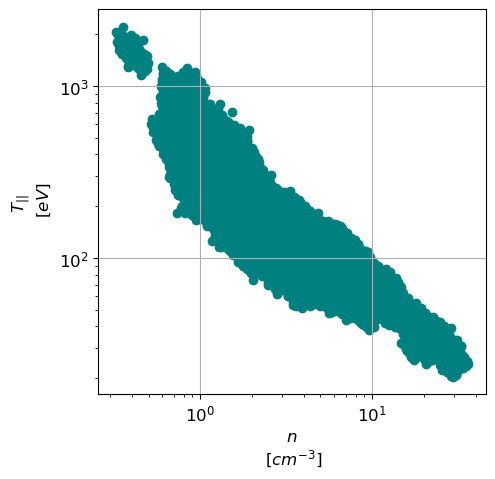

In [4]:

fig = plt.figure(figsize=(5,5))
plt.rcParams.update({'font.size': 12})



# Bx GSE
ax_Bx = fig.add_subplot(111)
#ax_Bx.set_title('Raw Data')
ax_Bx.scatter(MMS2_n['n'],MMS2_Tpara['Tpara'],color='teal')
ax_Bx.set_xlabel('$n$ \n [$cm^{-3}$]')
ax_Bx.set_ylabel('$T_{||}$ \n [$eV$]')
ax_Bx.grid('on')

ax_Bx.set_yscale("log")
ax_Bx.set_xscale("log")


Coefficients: 
 [[-0.8569494]]
Mean squared error: 0.09
Coefficient of determination: 0.81


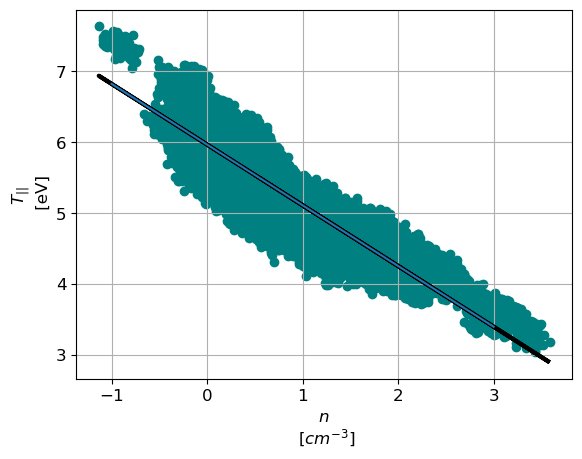

[5.96608827]
linear regression equation


In [12]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
# convert data to log

# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler




n_log = np.log(np.array(MMS2_n['n']))

Tpara_log = np.log(np.array(MMS2_Tpara['Tpara']))

# Split the data into training/testing sets
n_X_train = n_log[:-20]
n_X_test = n_log[-20:]

# Split the targets into training/testing sets
Tpara_y_train = Tpara_log[:-20]
Tpara_y_test = Tpara_log[-20:]

# train on 70% of data, test on 30%
X_train, X_test, y_train, y_test = train_test_split(n_log,Tpara_log, test_size = 0.3, random_state = 0)





 #reshape data
X_train = X_train.reshape(-1, 1)

#reshape data
y_train = y_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

#reshape data
y_test = y_test.reshape(-1, 1)


# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

# Plot outputs
x = np.linspace(-1, 3.0, 100)

plt.scatter(X_test, y_test, color="teal")
plt.plot(X_test, y_pred, color="black", linewidth=3)
#plt.plot(x, (-0.8569494*x +5.96608827))
plt.ylabel('$T_{||}$ \n [eV]')
plt.xlabel('$n$ \n [$cm^{-3}$]')
# plt.xticks(())
# plt.yticks(())
plt.grid()
plt.show()





print(regr.intercept_)
# regr.score(n_log, Tpara_log)
# print(regr.coef_)
# print(regr.intercept_)


print('linear regression equation',)